In [23]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Loading dataset
df=pd.read_csv('Amazon Sale Report.csv')

In [25]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [27]:
df = df.drop(columns=['New', 'PendingS'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [29]:
df.shape

(128976, 19)

In [30]:
df.dropna(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  float64
 16  ship-cou

In [32]:
df.shape

(37514, 19)

In [33]:
df['ship-postal-code']=df['ship-postal-code'].astype(int)

In [34]:
df['Date']=pd.to_datetime(df['Date'])

/tmp/ipython-input-3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [35]:
df=df.drop(columns=['index'])
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship


/tmp/ipython-input-4065715601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='crest')


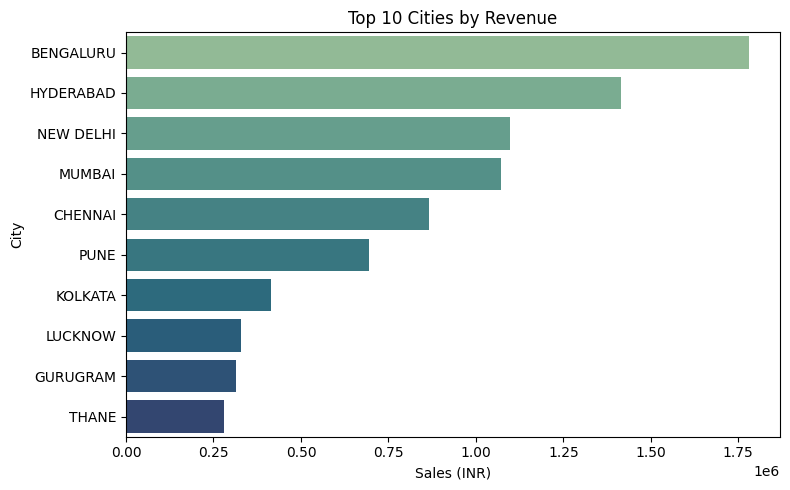

In [36]:
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='crest')
plt.title('Top 10 Cities by Revenue')
plt.xlabel('Sales (INR)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

The bar chart highlights the top 10 Indian cities by total revenue generated from orders.


*   Bengaluru leads with the highest sales, contributing over ₹1.75
million, followed by Hyderabad and New Delhi.
*   
Mumbai also performs strongly, while Chennai and Pune fall in the mid-tier revenue group.

*   The lowest revenue among the top 10 is seen from Thane and Gurugram.

This visualization indicates that metro cities dominate the e-commerce market, suggesting better order volume, customer base, and logistical coverage in those regions.

*To increase revenue further, targeted marketing campaigns and logistic
optimizations in mid-tier cities like Chennai, Pune, and Kolkata could help push them closer to the top performers.*

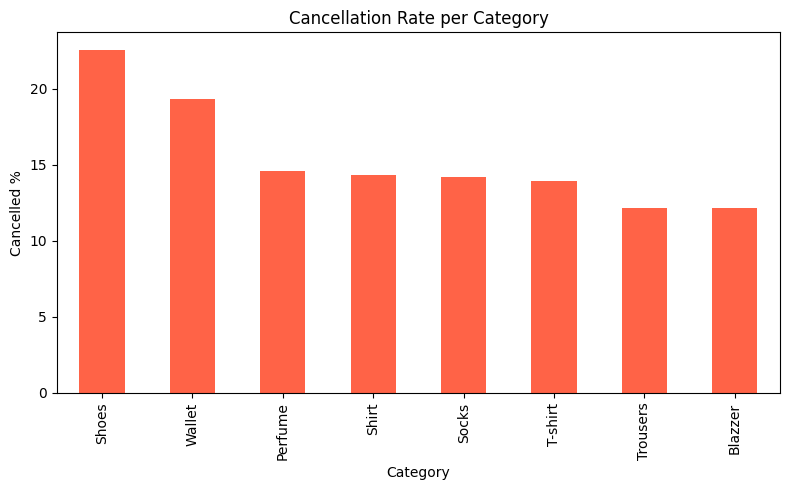

In [37]:
# Total and cancelled orders by category
cat_total = df.groupby('Category')['Qty'].count()
cat_cancelled = df[df['Qty'] == 0].groupby('Category')['Qty'].count()

# Cancellation rate
cancel_rate = (cat_cancelled / cat_total * 100).fillna(0).sort_values(ascending=False)

# Plot
cancel_rate.plot(kind='bar', color='tomato', figsize=(8,5))
plt.title('Cancellation Rate per Category')
plt.ylabel('Cancelled %')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


The bar chart illustrates the percentage of cancelled orders across various product categories.



*   Shoes have the highest cancellation rate at over 22%, indicating
potential issues like incorrect sizing, stockouts, or customer dissatisfaction.
*   Wallets and Perfumes follow closely with cancellation rates near 19% and 15% respectively.


*   Categories such as Blazzers, Trousers, and T-shirts exhibit the lowest cancellation rates, suggesting better customer satisfaction or logistics for these items.

The relatively high cancellation rate for certain fashion items (e.g., shoes, wallets) highlights the need for improvements in size accuracy, product descriptions, or delivery reliability.

*Businesses may consider refining product detail pages, enhancing size guides, or introducing flexible return policies for high-cancellation categories like Shoes and Wallets to improve conversion and retention.*

/tmp/ipython-input-992095439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category.index, y=category.values, palette='viridis')


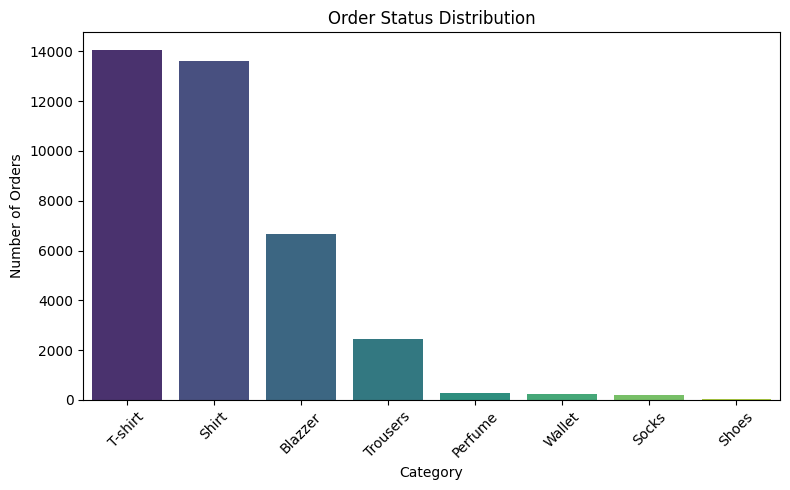

In [38]:
category= df['Category'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=category.index, y=category.values, palette='viridis')
plt.title('Order Status Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


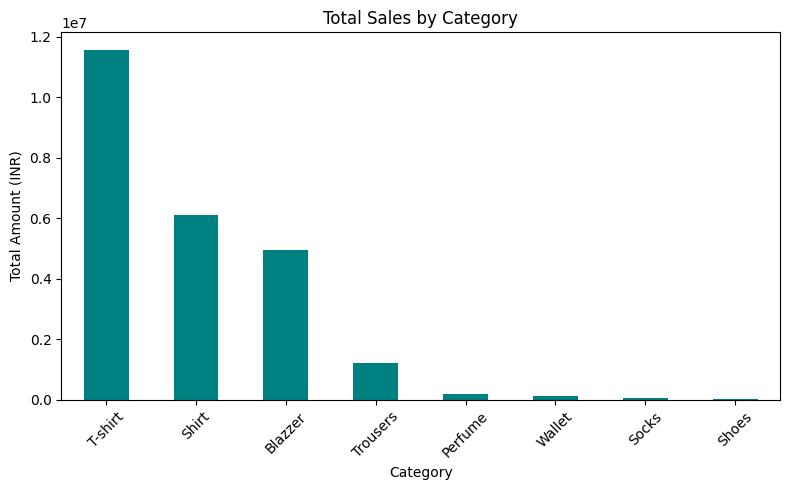

In [39]:
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sales_by_category.plot(kind='bar', color='teal')
plt.title('Total Sales by Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


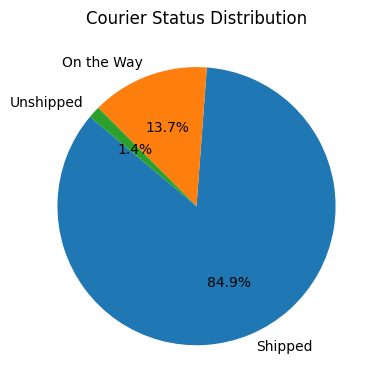

In [40]:
plt.figure(figsize=(6,4))
df['Courier Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Courier Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

The pie chart displays the distribution of courier statuses for customer orders.



*   A significant majority of orders (84.9%) are marked as Shipped, indicating timely dispatch and strong fulfillment performance.
*   13.7% of orders are On the Way, which reflects packages currently in transit.



*   A small portion (1.4%) of orders remain Unshipped, suggesting potential fulfillment delays or pending processing.

The data shows a healthy shipping flow, with nearly all orders either shipped or in transit.

*The low percentage of unshipped orders indicates good supply chain efficiency. However, consistent monitoring of "On the Way" delays and minimizing the "Unshipped" backlog could further enhance customer satisfaction.*

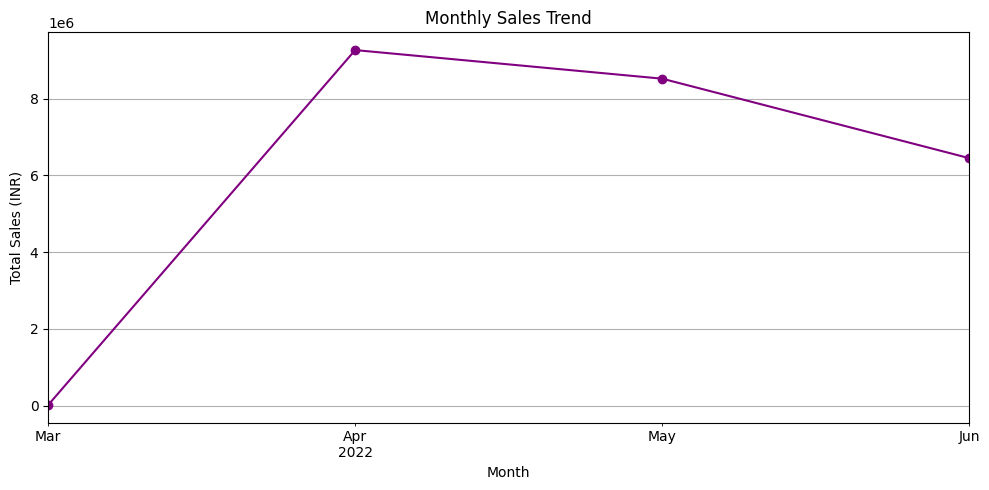

In [41]:
df['month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('month')['Amount'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,5), color='purple')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales (INR)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart illustrates the monthly sales performance (in INR) from March to June 2022.



*  Sales peaked in April 2022, reaching over ₹9 million, marking the highest revenue month in the period.
*  A slight decline followed in May, with total sales still remaining strong at above ₹8 million.


*   In June, sales saw a sharper drop, falling to approximately ₹6.5 million.



The trend indicates strong early-quarter performance, followed by a gradual decline—potentially due to seasonal demand, inventory constraints, or campaign cycles.

*To maintain momentum, businesses may consider replicating strategies from April, such as promotions, product launches, or advertising efforts. June's dip could be a trigger for reassessing marketing or fulfillment plans.*


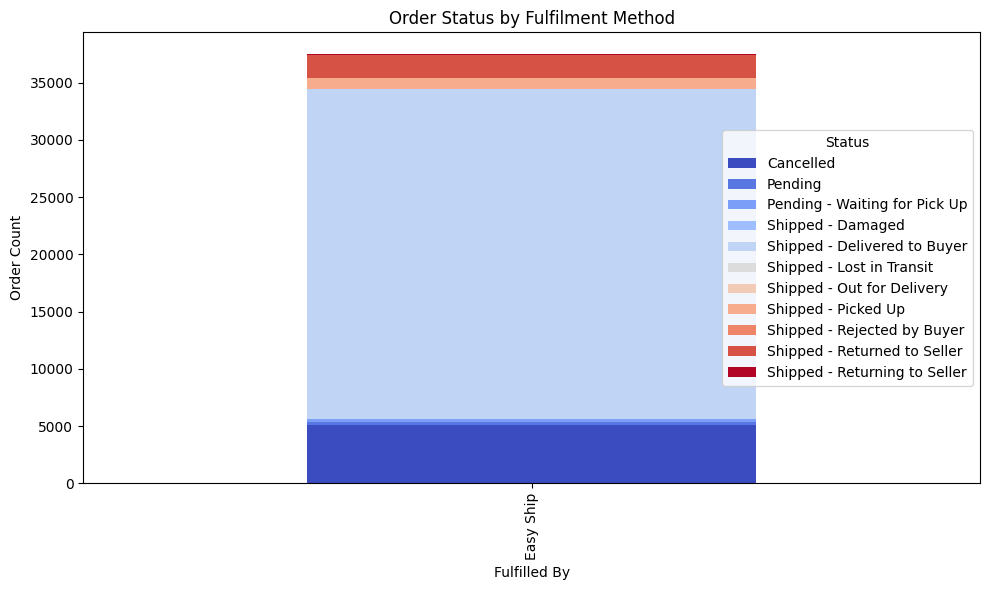

In [42]:
fulfil_status = df.groupby(['fulfilled-by', 'Status']).size().unstack().fillna(0)

fulfil_status.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Order Status by Fulfilment Method')
plt.ylabel('Order Count')
plt.xlabel('Fulfilled By')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2102293318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_state.values, y=cancel_state.index, palette='flare')


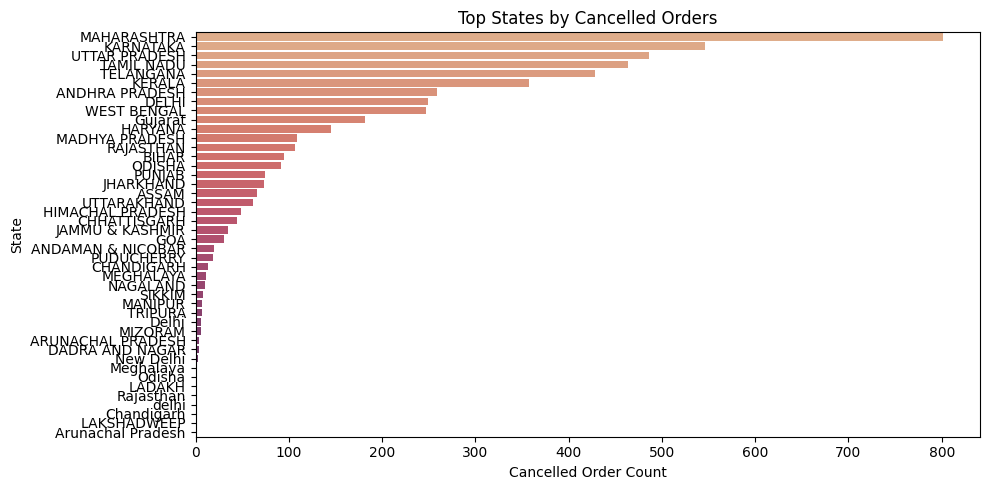

In [43]:
cancelled = df[df['Status'].str.contains("Cancelled")]
cancel_state = cancelled['ship-state'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=cancel_state.values, y=cancel_state.index, palette='flare')
plt.title('Top States by Cancelled Orders')
plt.xlabel('Cancelled Order Count')
plt.ylabel('State')
plt.tight_layout()
plt.show()




*   Maharashtra has the highest number of cancelled orders
*   Followed by Karnataka, UP, Tamil Nadu, and Telangana


*   Cancellations are significantly lower in smaller states/UTs

*Focus on top 5 states to reduce cancellation rates and improve service.*

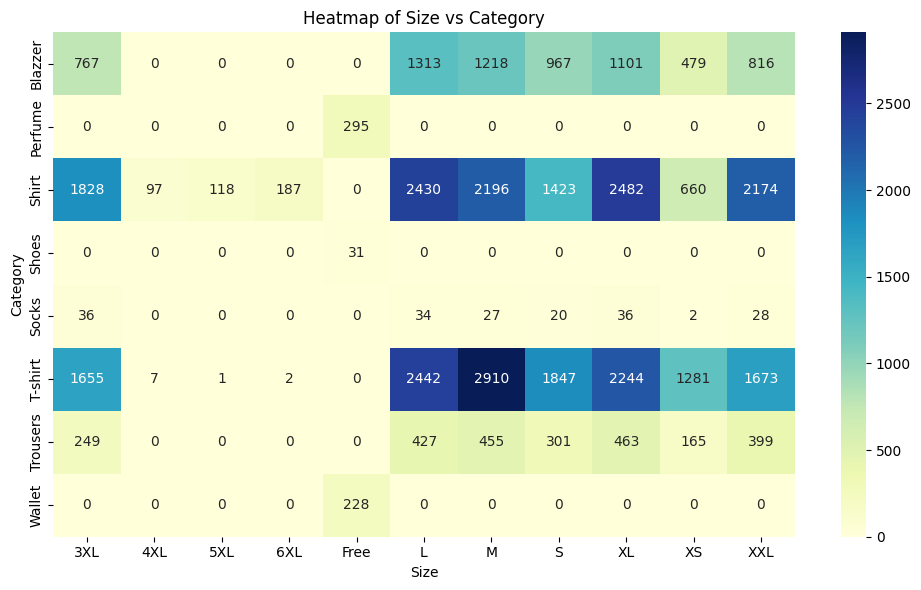

In [44]:
cat_size = df.pivot_table(index='Category', columns='Size', values='Order ID', aggfunc='count', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(cat_size, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Size vs Category')
plt.ylabel('Category')
plt.xlabel('Size')
plt.tight_layout()
plt.show()




*   T-Shirts and Shirts dominate across all sizes, especially in M, L, XL
*   Size M has the highest overall demand, followed by L and XL


*   Minimal demand for sizes 4XL–6XL and Free size is mostly for Perfume & Wallet


*Focus on stocking popular sizes (M, L, XL) in high-demand categories.*